# Import 버전들 확인

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import sklearn
import sys
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_validate, RepeatedKFold
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm, randint, uniform, rv_continuous
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, Ridge
from xgboost import XGBRegressor
import xgboost
import shap
import lightgbm
from lightgbm import LGBMRegressor
from pprint import pprint

print('Numpy Version', np.__version__)
print('Pandas Version', pd.__version__)
print('Matplotlib Version', matplotlib.__version__)
print('Scikit-Learn Version', sklearn.__version__)
print('Tensorflow Version', tf.__version__)
print('Python Version', sys.version)

C:\Users\dino3\miniconda3\envs\CERML\Lib\site-packages\shap\utils\_clustering.py:34: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
C:\Users\dino3\miniconda3\envs\CERML\Lib\site-packages\shap\utils\_clustering.py:53: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
C:\Users\dino3\miniconda3\envs\CERML\Lib\site-packages\shap\utils\_clustering.py:62: NumbaDe

Numpy Version 1.23.5
Pandas Version 1.5.3
Matplotlib Version 3.7.1
Scikit-Learn Version 1.2.2
Tensorflow Version 2.12.0
Python Version 3.11.3 | packaged by Anaconda, Inc. | (main, Apr 19 2023, 23:46:34) [MSC v.1916 64 bit (AMD64)]


In [2]:
%matplotlib inline

DATA 읽어오기

In [3]:
raw_data = pd.read_excel('data_new/CERML_reduction.xlsx')
print(raw_data)
feature_names = np.array(['Nnum', 'ed', 'Qe', 'EN', 'rcov', 'dMN'])

print(feature_names)

     M      G_Cl  Nnum    ed    Qe    EN  rcov   dMN
0   Mn  0.795966     4 -0.83  1.24  1.55  1.39  2.22
1   Fe  0.858026     4 -0.62  1.37  1.83  1.32  2.32
2   Co  1.150586     4 -1.01  0.91  1.88  1.26  2.03
3   Ni  1.829476     4 -1.17  0.77  1.92  1.24  1.95
4   Cu  1.902396     4 -1.50  0.71  1.90  1.32  2.11
..  ..       ...   ...   ...   ...   ...   ...   ...
70   W -2.478654     0 -0.90  1.73  2.36  1.62  2.40
71  Os -1.067414     0 -1.17  1.14  2.20  1.44  2.46
72  Ir -0.004404     0 -0.94  0.60  2.20  1.41  2.47
73  Pt  1.471646     0 -1.52  0.50  2.28  1.36  2.12
74  Au  1.570000     0 -3.33  0.50  2.54  1.36  2.51

[75 rows x 8 columns]
['Nnum' 'ed' 'Qe' 'EN' 'rcov' 'dMN']


# Data preprocessing

In [4]:
print(raw_data)
data_cleaned = raw_data.iloc[:,2:] # input data들만 모은 array
print(data_cleaned)

     M      G_Cl  Nnum    ed    Qe    EN  rcov   dMN
0   Mn  0.795966     4 -0.83  1.24  1.55  1.39  2.22
1   Fe  0.858026     4 -0.62  1.37  1.83  1.32  2.32
2   Co  1.150586     4 -1.01  0.91  1.88  1.26  2.03
3   Ni  1.829476     4 -1.17  0.77  1.92  1.24  1.95
4   Cu  1.902396     4 -1.50  0.71  1.90  1.32  2.11
..  ..       ...   ...   ...   ...   ...   ...   ...
70   W -2.478654     0 -0.90  1.73  2.36  1.62  2.40
71  Os -1.067414     0 -1.17  1.14  2.20  1.44  2.46
72  Ir -0.004404     0 -0.94  0.60  2.20  1.41  2.47
73  Pt  1.471646     0 -1.52  0.50  2.28  1.36  2.12
74  Au  1.570000     0 -3.33  0.50  2.54  1.36  2.51

[75 rows x 8 columns]
    Nnum    ed    Qe    EN  rcov   dMN
0      4 -0.83  1.24  1.55  1.39  2.22
1      4 -0.62  1.37  1.83  1.32  2.32
2      4 -1.01  0.91  1.88  1.26  2.03
3      4 -1.17  0.77  1.92  1.24  1.95
4      4 -1.50  0.71  1.90  1.32  2.11
..   ...   ...   ...   ...   ...   ...
70     0 -0.90  1.73  2.36  1.62  2.40
71     0 -1.17  1.14  2.20  1

여기서부터 Supervised Learning Part (SVM, Randomforest, NN)

Training set 나누기!

In [5]:
x = data_cleaned.astype(float)
y = raw_data.iloc[:,1].astype(float)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)  # 적당한 비율로 training과 test set을 나누는 부분

# Feature Importance Search

Data Scaling

In [6]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)
x_scaled = scaler.fit_transform(x)
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled_df = pd.DataFrame(x_test_scaled, columns=x_test.columns)

Permutation functions 선언

In [7]:
def get_score_after_permutation(model, X, y, curr_feat):
    """ return the score of model when curr_feat is permuted """

    X_permuted = X.copy()
    col_idx = list(X.columns).index(curr_feat)
    # permute one column
    X_permuted.iloc[:, col_idx] = np.random.permutation(
        X_permuted[curr_feat].values)

    permuted_score = model.score(X_permuted, y)
    return permuted_score


def get_feature_importance(model, X, y, curr_feat):
    """ compare the score when curr_feat is permuted """

    baseline_score_train = model.score(X, y)
    permuted_score_train = get_score_after_permutation(model, X, y, curr_feat)

    # feature importance is the difference between the two scores
    feature_importance = baseline_score_train - permuted_score_train
    return feature_importance

def permutation_importance(model, X, y, n_repeats=10):
    """Calculate importance score for each feature."""

    importances = []
    for curr_feat in X.columns:
        list_feature_importance = []
        for n_round in range(n_repeats):
            list_feature_importance.append(
                get_feature_importance(model, X, y, curr_feat))

        importances.append(list_feature_importance)

    return {'importances_mean': np.mean(importances, axis=1),
            'importances_std': np.std(importances, axis=1),
            'importances': importances}

def plot_feature_importances(perm_importance_result, feat_name):
    """ bar plot the feature importance """

    fig, ax = plt.subplots()

    indices = perm_importance_result['importances_mean'].argsort()
    plt.barh(range(len(indices)),
             perm_importance_result['importances_mean'][indices],
             xerr=perm_importance_result['importances_std'][indices])

    ax.set_yticks(range(len(indices)))
    _ = ax.set_yticklabels(feat_name[indices])

Data 분포 정의 for alpha values

In [8]:
class CustomExpNormal(rv_continuous):
    def __init__(self, mean, std):
        super().__init__()
        self.mean = mean
        self.std = std

    def _pdf(self, x):
        norm_factor = 1.0 / (self.std * np.sqrt(2 * np.pi))
        exponent = -0.5 * ((np.log(np.maximum(1e-10, x)) - self.mean) / self.std)**2

        valid_indices = x > 0
        pdf = np.zeros_like(x)
        pdf[valid_indices] = norm_factor * np.exp(exponent[valid_indices])

        return pdf

### 1. Ridge 기반 Feature importance

In [9]:
params_ridge = {'alpha': CustomExpNormal(0,3)}

In [10]:
ridge = Ridge()
ridge_random = RandomizedSearchCV(estimator = ridge, param_distributions=params_ridge, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1, scoring='neg_mean_squared_error')
ridge_random.fit(x_train_scaled_df, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=Ridge(), n_iter=100, n_jobs=-1,
                   param_distributions={'alpha': <__main__.CustomExpNormal object at 0x000001BB8DBC7310>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [11]:
best_ridge = ridge_random.best_estimator_

print("Best Estimator:", ridge_random.best_params_)

print('Score on training set:', best_ridge.score(x_train_scaled_df, y_train))
print('Score on test set:', best_ridge.score(x_test_scaled_df, y_test))

Best Estimator: {'alpha': 4.898733490099084}
Score on training set: 0.8749833167936206
Score on test set: 0.8317016698011064


In [12]:
predict_ridge_train = best_ridge.predict(x_train_scaled_df) # 최고의 개수로 학습한 거에 x_train을 넣은 결과
predict_ridge = best_ridge.predict(x_test_scaled_df) # 최고의 개수로 학습한 거에 x_test를 넣은 결과

mse_ridge_train = mean_squared_error(y_train, predict_ridge_train) # rdf에서 train set 에러
mse_ridge_test = mean_squared_error(y_test, predict_ridge) # rdf에서 test set 에러

print(mse_ridge_train)
print(mse_ridge_test)

0.1623423791129411
0.17400027880372432


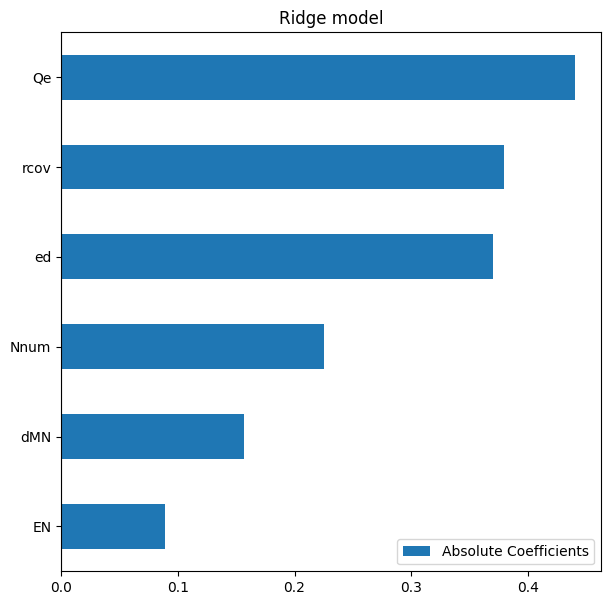

In [13]:
# Create a DataFrame of coefficients
coefs = pd.DataFrame(
   abs(best_ridge.coef_),  # Take absolute values of coefficients
   columns=['Absolute Coefficients'], index=x_train.columns
)

# Sort by absolute coefficients
sorted_coefs = coefs.sort_values(by='Absolute Coefficients', ascending=True)

# Create bar plot
sorted_coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Ridge model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)
plt.savefig('Figs_reduction/Ridge.png')
plt.show()

#### Permutation도 보기

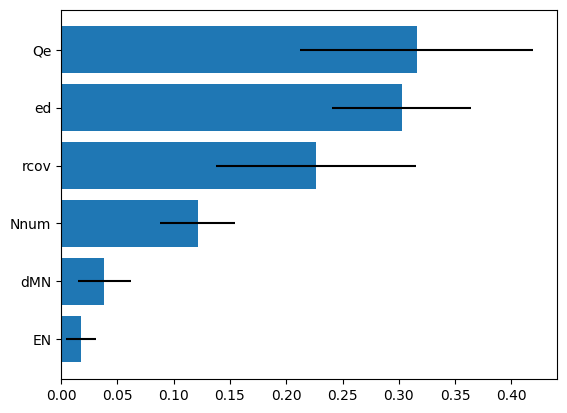

In [14]:
perm_importance_result_test = permutation_importance(best_ridge, x_test_scaled_df, y_test, n_repeats=10)
plot_feature_importances(perm_importance_result_test, x_test.columns)

### 2. Lasso 기반 Feautre importance

In [15]:
params_lasso = {'alpha': CustomExpNormal(0,3)}

In [16]:
lasso = Lasso()
lasso_random = RandomizedSearchCV(estimator = lasso, param_distributions=params_lasso, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1, scoring='neg_mean_squared_error')
lasso_random.fit(x_train_scaled_df, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=Lasso(), n_iter=100, n_jobs=-1,
                   param_distributions={'alpha': <__main__.CustomExpNormal object at 0x000001BB8DC7DAD0>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [17]:
best_lasso = lasso_random.best_estimator_

print("Best Estimator:", lasso_random.best_params_)

print('Score on training set:', best_lasso.score(x_train_scaled_df, y_train))
print('Score on test set:', best_lasso.score(x_test_scaled_df, y_test))

Best Estimator: {'alpha': 0.08029389726155224}
Score on training set: 0.8554543292463107
Score on test set: 0.8098979913633311


In [18]:
predict_lasso_train = best_lasso.predict(x_train_scaled_df) # 최고의 개수로 학습한 거에 x_train을 넣은 결과
predict_lasso = best_lasso.predict(x_test_scaled_df) # 최고의 개수로 학습한 거에 x_test를 넣은 결과

mse_lasso_train = mean_squared_error(y_train, predict_lasso_train) # rdf에서 train set 에러
mse_lasso_test = mean_squared_error(y_test, predict_lasso) # rdf에서 test set 에러

print(mse_lasso_train)
print(mse_lasso_test)

0.1877020528683517
0.1965426660195459


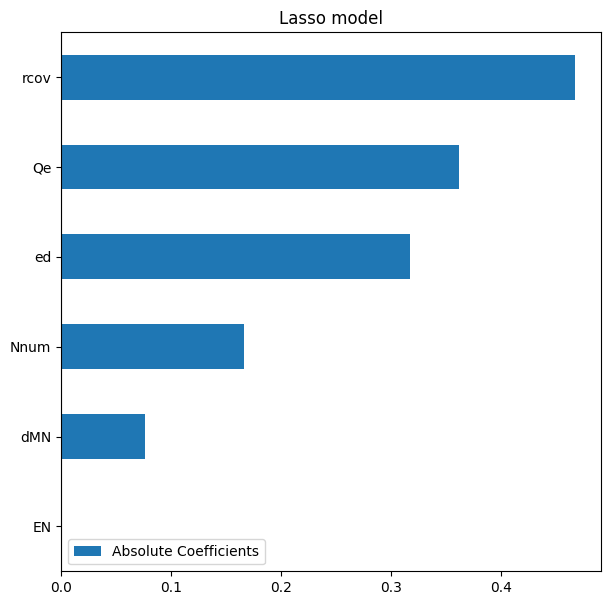

In [19]:
# Create a DataFrame of coefficients
coefs = pd.DataFrame(
   abs(best_lasso.coef_),  # Take absolute values of coefficients
   columns=['Absolute Coefficients'], index=x_train.columns
)

# Sort by absolute coefficients
sorted_coefs = coefs.sort_values(by='Absolute Coefficients', ascending=True)

# Create bar plot
sorted_coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Lasso model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)
plt.savefig('Figs_reduction/Lasso.png')
plt.show()

#### Permutation도 보기

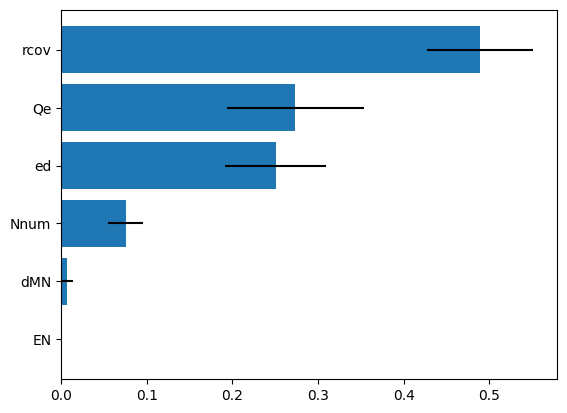

In [20]:
perm_importance_result_test = permutation_importance(best_lasso, x_test_scaled_df, y_test, n_repeats=10)
plot_feature_importances(perm_importance_result_test, x_test.columns)

### 3. RandomForest 기반 Feature importance

In [21]:
n_estimators = randint(100, 1000)

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 7, 10]

min_samples_leaf = [1, 2, 3, 4]

bootstrap = [True, False]

params_rf = {'n_estimators': n_estimators,
             'max_depth': max_depth,
             'min_samples_split': min_samples_split,
             'min_samples_leaf': min_samples_leaf,
             'bootstrap': bootstrap}
pprint(params_rf)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_leaf': [1, 2, 3, 4],
 'min_samples_split': [2, 5, 7, 10],
 'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001BB8DFA49D0>}


In [22]:
rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = params_rf, n_iter = 250, cv = 5, verbose=2, random_state=42, n_jobs = -1, scoring='neg_mean_squared_error')

rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=250,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 5, 7, 10],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001BB8DFA49D0>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [23]:
# 최적의 모델 및 파라미터 출력

best_rf = rf_random.best_estimator_

print("Best Estimator:", rf_random.best_params_)

print('Score on training set:', best_rf.score(x_train, y_train))
print('Score on test set:', best_rf.score(x_test, y_test))

Best Estimator: {'bootstrap': True, 'max_depth': 80, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 615}
Score on training set: 0.9930794395337804
Score on test set: 0.9301671519712916


In [24]:
predict_rf_train = best_rf.predict(x_train) # 최고의 개수로 학습한 거에 x_train을 넣은 결과
predict_rf = best_rf.predict(x_test) # 최고의 개수로 학습한 거에 x_test를 넣은 결과

mse_rf_train = mean_squared_error(y_train, predict_rf_train) # rdf에서 train set 에러
mse_rf_test = mean_squared_error(y_test, predict_rf) # rdf에서 test set 에러

print(mse_rf_train)
print(mse_rf_test)

0.00898680257759167
0.07219878540858651


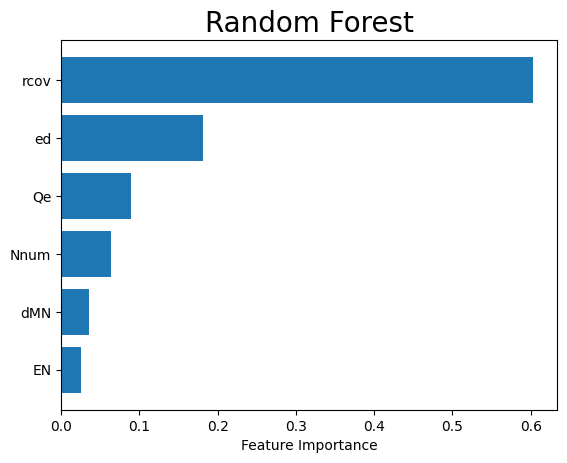

In [25]:
sort = best_rf.feature_importances_.argsort()
plt.barh(feature_names[sort], best_rf.feature_importances_[sort])
plt.title('Random Forest', fontsize='20')
plt.xlabel("Feature Importance", fontsize='10')
plt.savefig('Figs_reduction/RF.png')

#### Permutation도 보기

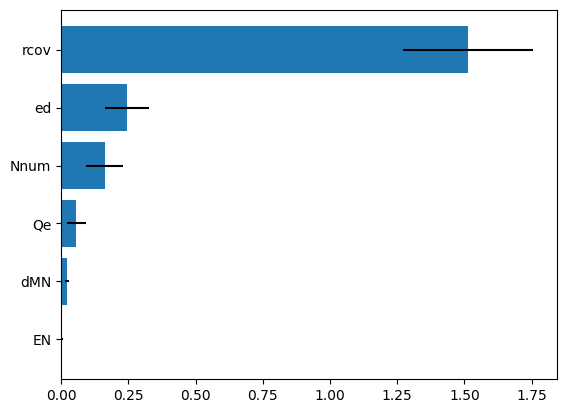

In [26]:
perm_importance_result_test = permutation_importance(best_rf, x_test, y_test, n_repeats=10)

plot_feature_importances(perm_importance_result_test, x_test.columns)

#### Shap 분석

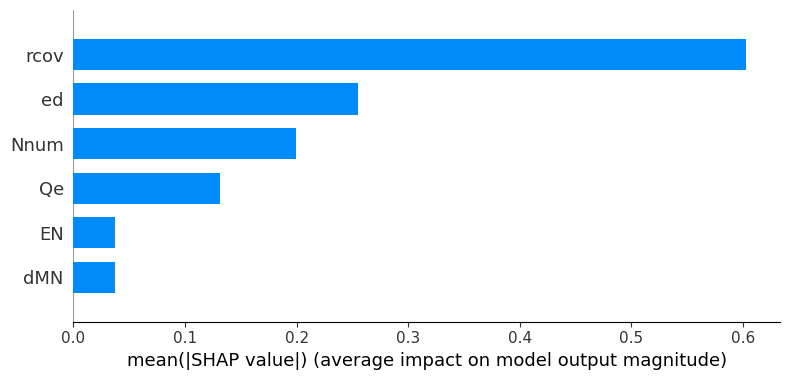

In [27]:
explainer = shap.TreeExplainer(best_rf)
shap_values = explainer.shap_values(x_test)

shap.summary_plot(shap_values, x_test, plot_type="bar")

### 4. XGBoost 기반 Feature importance

In [28]:
params_xgb = {
    'n_estimators': randint(100, 1000),
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7],
    'min_child_weight': [1, 2, 3, 4, 5],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1],
}

In [29]:
xgb = XGBRegressor()
xgb_random = RandomizedSearchCV(estimator = xgb, param_distributions = params_xgb, n_iter = 250, cv = 5, verbose=2, random_state=42, n_jobs = -1, scoring='neg_mean_squared_error')
xgb_random.fit(x_train, y_train)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1],
                                        'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.3],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'min_child_weight': [1, 2, 3, 4, 5],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001BB8E1D0090>,
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [30]:
# 최적의 모델 및 파라미터 출력
print("Best Estimator:", xgb_random.best_params_)

print('Score on training set:', xgb_random.best_estimator_.score(x_train, y_train))
print('Score on test set:', xgb_random.best_estimator_.score(x_test, y_test))

best_xgb = xgb_random.best_estimator_

Best Estimator: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 985, 'subsample': 0.6}
Score on training set: 0.9999880144131251
Score on test set: 0.911540971498847


In [31]:
predict_xgb_train = best_xgb.predict(x_train) # 최고의 개수로 학습한 거에 x_train을 넣은 결과
predict_xgb = best_xgb.predict(x_test) # 최고의 개수로 학습한 거에 x_test를 넣은 결과

mse_xgb_train = mean_squared_error(y_train, predict_xgb_train) # rdf에서 train set 에러
mse_xgb_test = mean_squared_error(y_test, predict_xgb) # rdf에서 test set 에러

print(mse_xgb_train)
print(mse_xgb_test)

1.5564072237598284e-05
0.09145602100577699


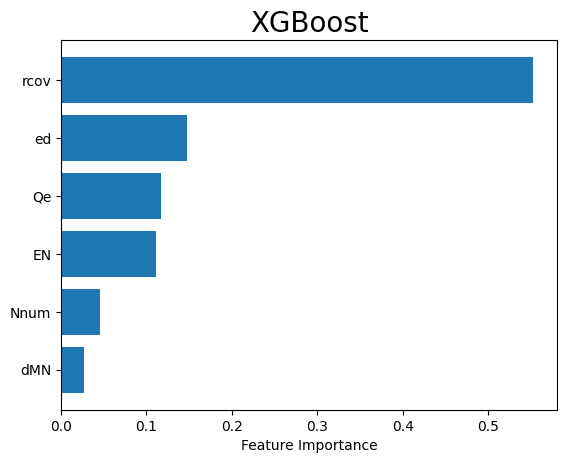

In [32]:
sorted_idx = best_xgb.feature_importances_.argsort()
plt.barh(feature_names[sorted_idx], best_xgb.feature_importances_[sorted_idx])
plt.title('XGBoost', fontsize='20')
plt.xlabel("Feature Importance", fontsize='10')
plt.savefig('Figs_reduction/XGBoost.png')

#### Permutation도 보기

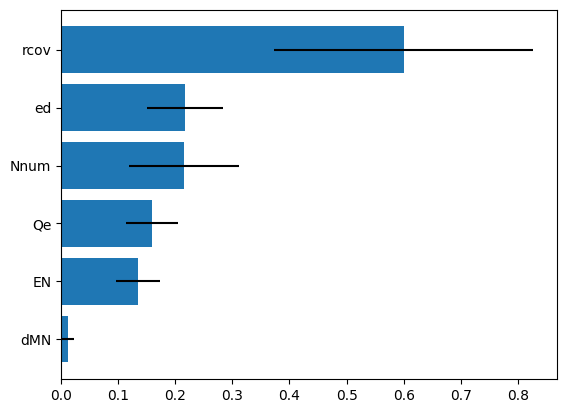

In [33]:
perm_importance_result_train = permutation_importance(best_xgb, x_test, y_test, n_repeats=10)

plot_feature_importances(perm_importance_result_train, x_train.columns)

#### SHAP 분석

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


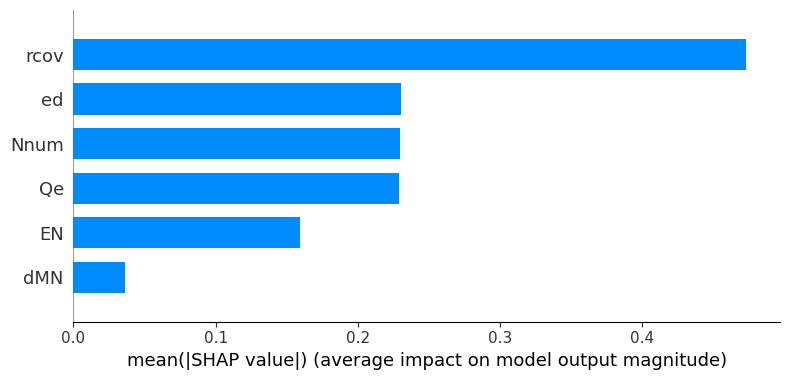

In [34]:
explainer = shap.TreeExplainer(best_xgb)
shap_values = explainer.shap_values(x_test)

shap.summary_plot(shap_values, x_test, plot_type="bar")

### 5. LightGBM 기반 Feature importance

In [35]:
params_lightgbm = {
    'learning_rate': [0.01, 0.1, 0.3, 0.5, 1],
    'num_leaves': randint(6, 50),
    'boosting_type' : ['gbdt'],
    'objective' : ['binary'],
    'max_depth' : [5,6,7,8],
    'random_state' : [501], 
    'colsample_bytree' : uniform(loc=0.4, scale=0.6),
    'subsample' : uniform(loc=0.2, scale=0.8),
    'min_split_gain' : [0.01, 0.03, 0.05],
    'n_estimators' : [100, 500, 1000, 2000]
    }

In [36]:
lgb = LGBMRegressor()
lgb_random = RandomizedSearchCV(lgb,params_lightgbm,verbose=1,cv=5,n_jobs = -1,n_iter=100)
lgb_random.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=LGBMRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'boosting_type': ['gbdt'],
                                        'colsample_bytree': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001BB8DE6B750>,
                                        'learning_rate': [0.01, 0.1, 0.3, 0.5,
                                                          1],
                                        'max_depth': [5, 6, 7, 8],
                                        'min_split_gain': [0.01, 0.03, 0.05],
                                        'n_estimators': [100, 500, 1000, 2000],
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001BB8DE7D1D0>,
                                        'objective': ['binary'],
                                        'random_state': [501],
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001BB8DE02150>},
                   verbose=1)

In [37]:
# 최적의 모델 및 파라미터 출력
print("Best Estimator:", lgb_random.best_params_)

print('Score on training set:', lgb_random.best_estimator_.score(x_train, y_train))
print('Score on test set:', lgb_random.best_estimator_.score(x_test, y_test))

best_lgb = lgb_random.best_estimator_

Best Estimator: {'boosting_type': 'gbdt', 'colsample_bytree': 0.4284795832116246, 'learning_rate': 1, 'max_depth': 7, 'min_split_gain': 0.01, 'n_estimators': 2000, 'num_leaves': 21, 'objective': 'binary', 'random_state': 501, 'subsample': 0.2645824916161137}
Score on training set: 0.43985296985137134
Score on test set: 0.5120372296436801


In [38]:
predict_lgb_train = best_lgb.predict(x_train) # 최고의 개수로 학습한 거에 x_train을 넣은 결과
predict_lgb = best_lgb.predict(x_test) # 최고의 개수로 학습한 거에 x_test를 넣은 결과

mse_lgb_train = mean_squared_error(y_train, predict_lgb_train) # rdf에서 train set 에러
mse_lgb_test = mean_squared_error(y_test, predict_lgb) # rdf에서 test set 에러

print(mse_lgb_train)
print(mse_lgb_test)

0.7273877309419489
0.5044949524305827


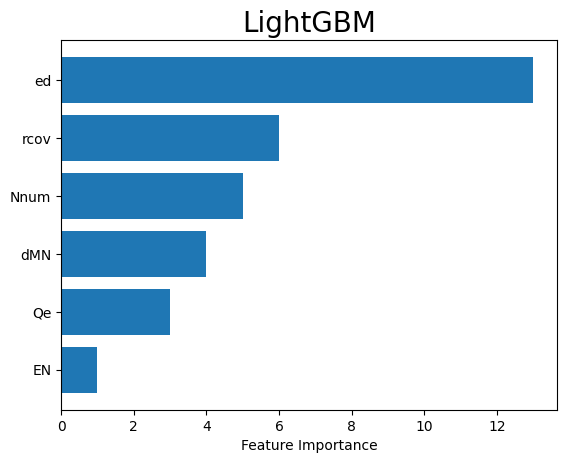

In [39]:
sorted_idx = best_lgb.feature_importances_.argsort()
plt.barh(feature_names[sorted_idx], best_lgb.feature_importances_[sorted_idx])
plt.title('LightGBM', fontsize='20')
plt.xlabel("Feature Importance", fontsize='10')
plt.savefig('Figs_reduction/LightGBM.png')

#### Permutation도 보기

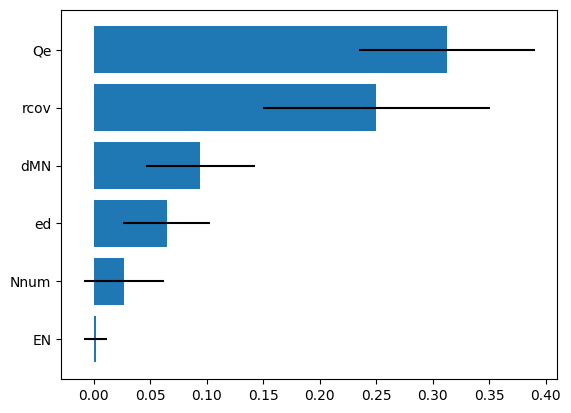

In [40]:
perm_importance_result_train = permutation_importance(best_lgb, x_test, y_test, n_repeats=10)

plot_feature_importances(perm_importance_result_train, x_train.columns)

# 상관계수 분석

In [41]:
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.show()

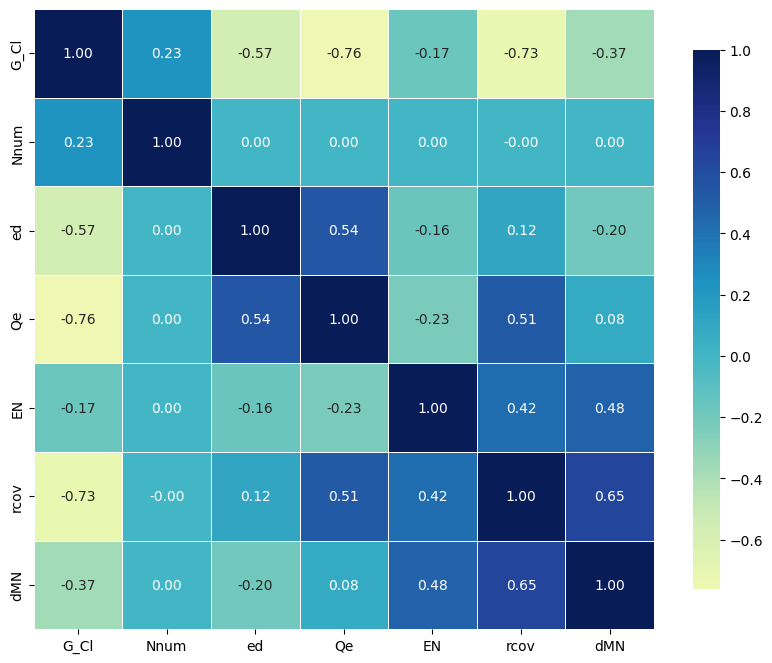

In [42]:
corr = raw_data.iloc[:,1:]
feature_names_corr = np.array(['G_Cl','Nnum', 'ed', 'Qe', 'EN', 'rcov', 'dMN'])

correlation_heatmap(corr[feature_names_corr])

# PCA 분석

#### G_Cl 미포함

In [43]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2D = pca.fit_transform(x_scaled)

In [44]:
pca.explained_variance_ratio_

array([0.34976537, 0.2914622 ])

(75,)


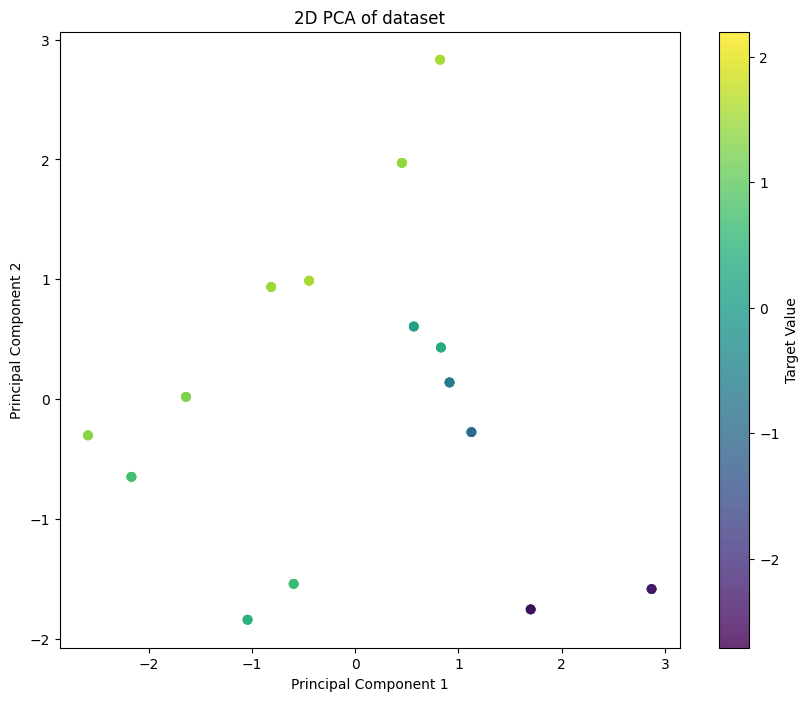

In [45]:
# scatter plot
plt.figure(figsize=(10, 8))
print(X2D[:, 1].shape)
scatter = plt.scatter(X2D[:, 0], X2D[:, 1], c=y, alpha=0.8)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of dataset')

#plt.xlim(-10, 10)   # x축 범위 설정
#plt.ylim(-10, 10)   # y축 범위 설정

# Add a color bar
colorbar = plt.colorbar(scatter)
colorbar.set_label('Target Value')

plt.show()

#### G_Cl 포함

In [46]:
pca = PCA(n_components = 2)
X2D = pca.fit_transform(corr)

In [47]:
pca.explained_variance_ratio_

array([0.49112735, 0.37476216])

(75,)


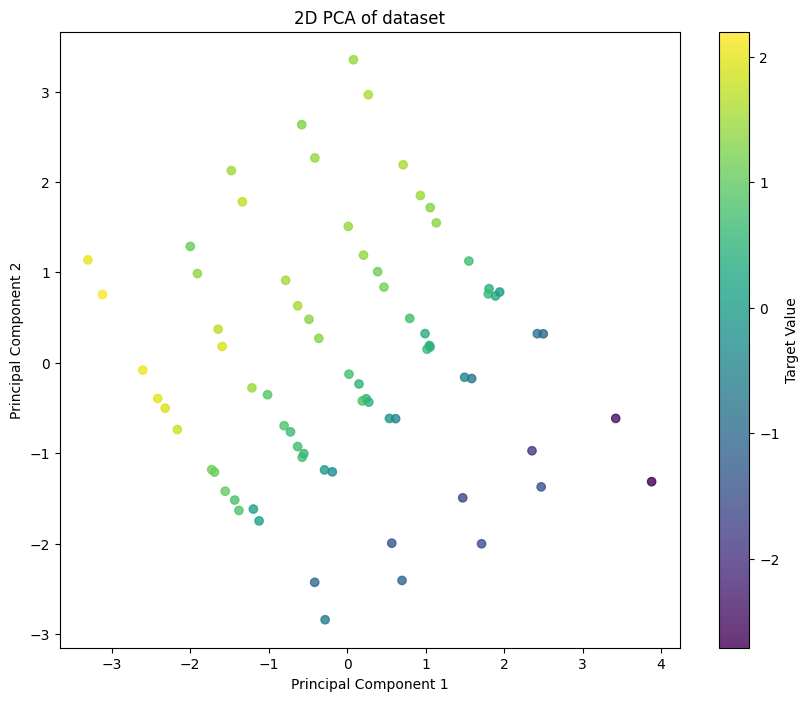

In [48]:
# scatter plot
plt.figure(figsize=(10, 8))
print(X2D[:, 1].shape)
scatter = plt.scatter(X2D[:, 0], X2D[:, 1], c=y, alpha=0.8)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of dataset')

#plt.xlim(-10, 10)   # x축 범위 설정
#plt.ylim(-10, 10)   # y축 범위 설정

# Add a color bar
colorbar = plt.colorbar(scatter)
colorbar.set_label('Target Value')

plt.show()